In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns  # Import Seaborn
import matplotlib.pyplot as plt

# **load the dataset**

In [ ]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['target'] = target

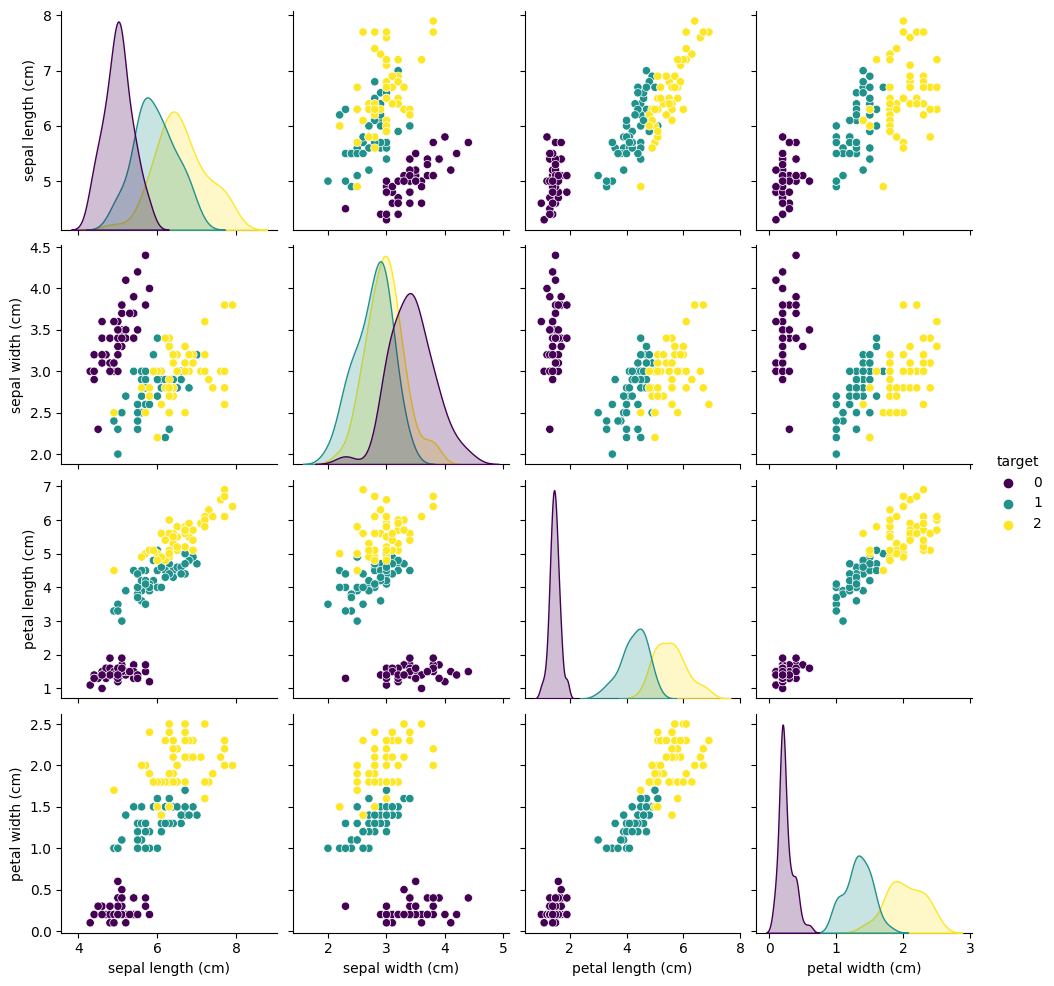

In [ ]:
# Explore the dataset
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.show()

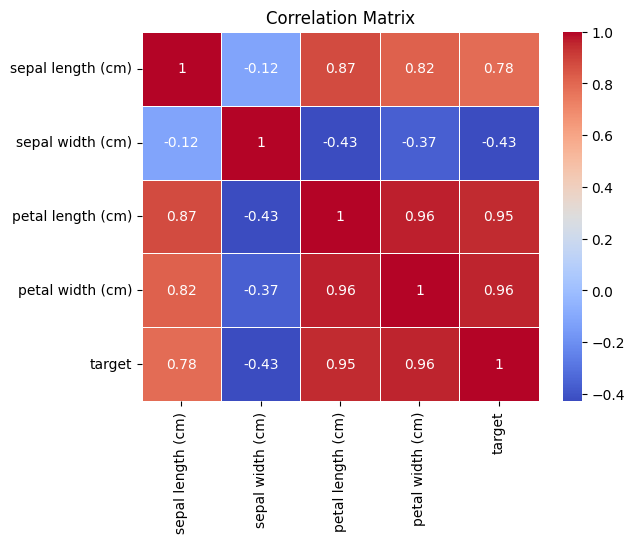

In [ ]:
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
Accuracy: 0.3333
Precision: 0.1111
Recall: 0.3333
F1 Score: 0.1667


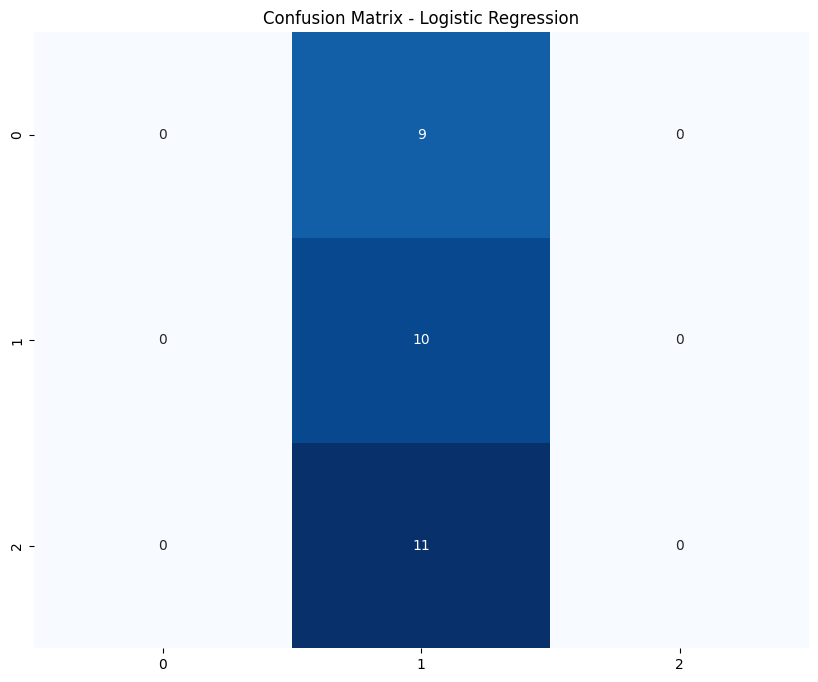


MLP Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


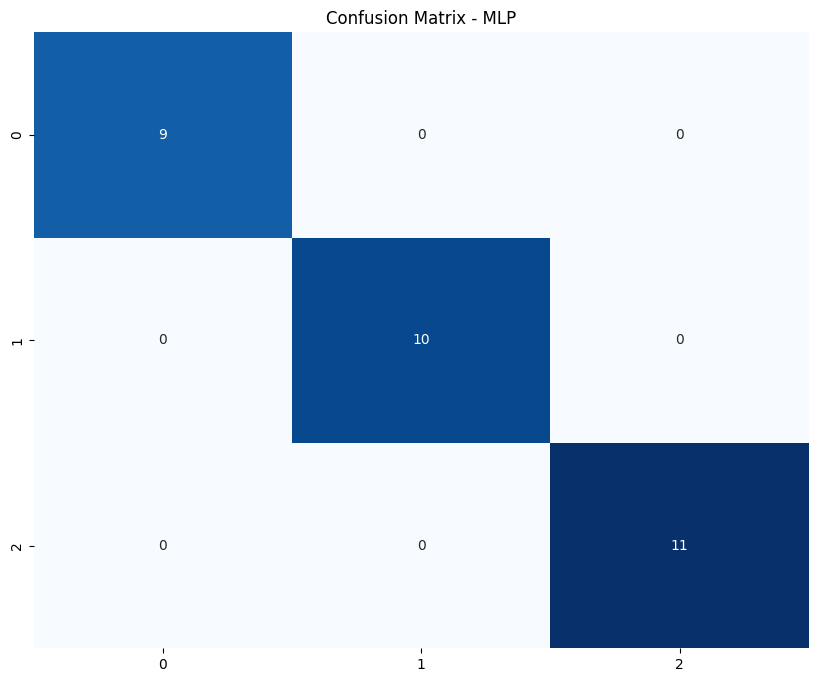


RBF Neural Network Metrics:
Accuracy: 0.9333
Precision: 0.9444
Recall: 0.9333
F1 Score: 0.9330


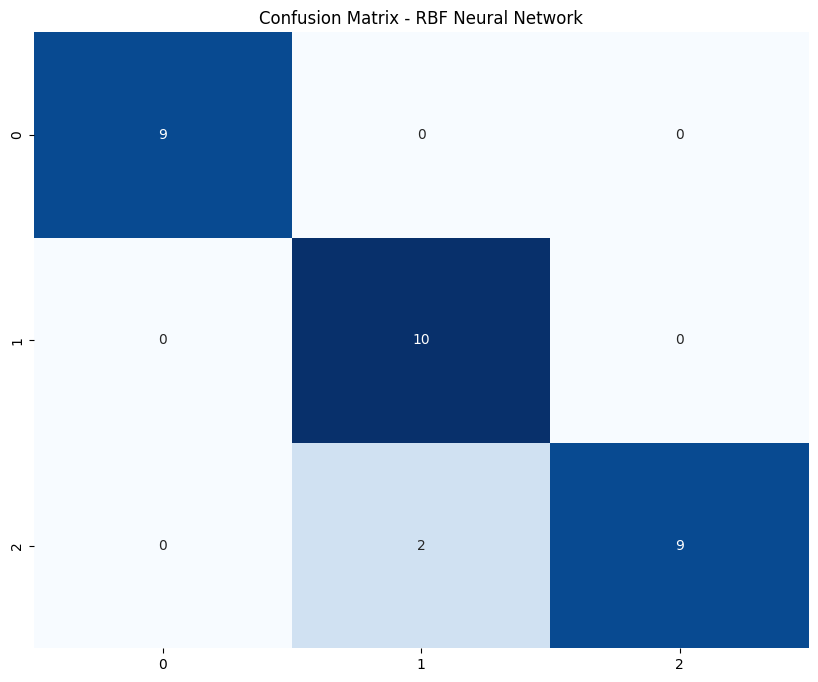

In [ ]:
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(data, target, test_size=0.2, random_state=93)


# Add bias term to the features
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Adding bias term
X_eval = np.hstack((X_eval, np.ones((X_eval.shape[0], 1))))  # Adding bias term

# Logistic Regression
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1])

        for epoch in range(self.epochs):
            z = np.dot(X, self.weights)
            predictions = self.sigmoid(z)
            error = y - predictions

            gradient = np.dot(X.T, error)
            self.weights += self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.weights)
        predictions = self.sigmoid(z)
        return np.round(predictions)

# Multi-Layer Perceptron (MLP)
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden)
            hidden_layer_output = self.sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
            output_layer_output = self.softmax(output_layer_input)

            # Backward pass
            output_error = y - output_layer_output
            output_delta = output_error

            hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
            hidden_layer_delta = hidden_layer_error * (hidden_layer_output * (1 - hidden_layer_output))

            # Update weights
            self.weights_hidden_output += self.learning_rate * hidden_layer_output.T.dot(output_delta)
            self.weights_input_hidden += self.learning_rate * X.T.dot(hidden_layer_delta)

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden)
        hidden_layer_output = self.sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        output_layer_output = self.softmax(output_layer_input)

        return np.argmax(output_layer_output, axis=1)

# Radial Basis Function (RBF) Neural Network
class RBFNN:
    def __init__(self, num_centers, learning_rate=0.01, epochs=1000):
        self.num_centers = num_centers
        self.learning_rate = learning_rate
        self.epochs = epochs

    def gaussian_rbf(self, x, c, sigma):
        return np.exp(-np.linalg.norm(x - c) / (2 * sigma**2))

    def train(self, X, y):
        self.centers = X[np.random.choice(X.shape[0], self.num_centers, replace=False)]
        self.sigma = np.std(X)

        self.weights = np.random.rand(self.num_centers)

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                phi = np.array([self.gaussian_rbf(X[i], c, self.sigma) for c in self.centers])
                prediction = np.dot(phi, self.weights)
                error = y[i] - prediction

                # Update weights
                self.weights += self.learning_rate * error * phi

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            phi = np.array([self.gaussian_rbf(X[i], c, self.sigma) for c in self.centers])
            prediction = np.dot(phi, self.weights)
            predictions.append(prediction)

        return np.round(predictions)

# Convert target labels to one-hot encoding for MLP
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((len(labels), num_classes))
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

# Convert target labels to integers for RBFNN
def convert_to_integer_labels(labels):
    label_map = {label: i for i, label in enumerate(np.unique(labels))}
    return np.array([label_map[label] for label in labels])

# One-hot encode target labels for MLP
y_train_one_hot = one_hot_encode(y_train, len(np.unique(y_train)))
y_eval_one_hot = one_hot_encode(y_eval, len(np.unique(y_eval)))

# Logistic Regression
lr_model = LogisticRegression()
lr_model.train(X_train, y_train)
lr_pred = lr_model.predict(X_eval)

# MLP
mlp_model = MLP(input_size=X_train.shape[1], hidden_size=10, output_size=len(np.unique(y_train)), epochs=1000)
mlp_model.train(X_train, y_train_one_hot)
mlp_pred = mlp_model.predict(X_eval)

# RBF Neural Network
num_rbf_centers = 10
rbf_model = RBFNN(num_centers=num_rbf_centers, epochs=1000)
rbf_model.train(X_train, convert_to_integer_labels(y_train))
rbf_pred = rbf_model.predict(X_eval)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_eval, lr_pred)
lr_precision = precision_score(y_eval, lr_pred, average='weighted')
lr_recall = recall_score(y_eval, lr_pred, average='weighted')
lr_f1 = f1_score(y_eval, lr_pred, average='weighted')

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

# Confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_eval, lr_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Evaluate MLP
mlp_accuracy = accuracy_score(y_eval, mlp_pred)
mlp_precision = precision_score(y_eval, mlp_pred, average='weighted')
mlp_recall = recall_score(y_eval, mlp_pred, average='weighted')
mlp_f1 = f1_score(y_eval, mlp_pred, average='weighted')

print("\nMLP Metrics:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")

# Confusion matrix for MLP
mlp_cm = confusion_matrix(y_eval, mlp_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP")
plt.show()

# Evaluate RBF Neural Network
rbf_accuracy = accuracy_score(y_eval, rbf_pred)
rbf_precision = precision_score(y_eval, rbf_pred, average='weighted')
rbf_recall = recall_score(y_eval, rbf_pred, average='weighted')
rbf_f1 = f1_score(y_eval, rbf_pred, average='weighted')

print("\nRBF Neural Network Metrics:")
print(f"Accuracy: {rbf_accuracy:.4f}")
print(f"Precision: {rbf_precision:.4f}")
print(f"Recall: {rbf_recall:.4f}")
print(f"F1 Score: {rbf_f1:.4f}")

# Confusion matrix for RBF Neural Network
rbf_cm = confusion_matrix(y_eval, rbf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(rbf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - RBF Neural Network")
plt.show()

# **using libraries**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
logistic_regression_model = LogisticRegression()

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression_model.predict(X_eval)

# Evaluate the model
accuracy = accuracy_score(y_eval, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


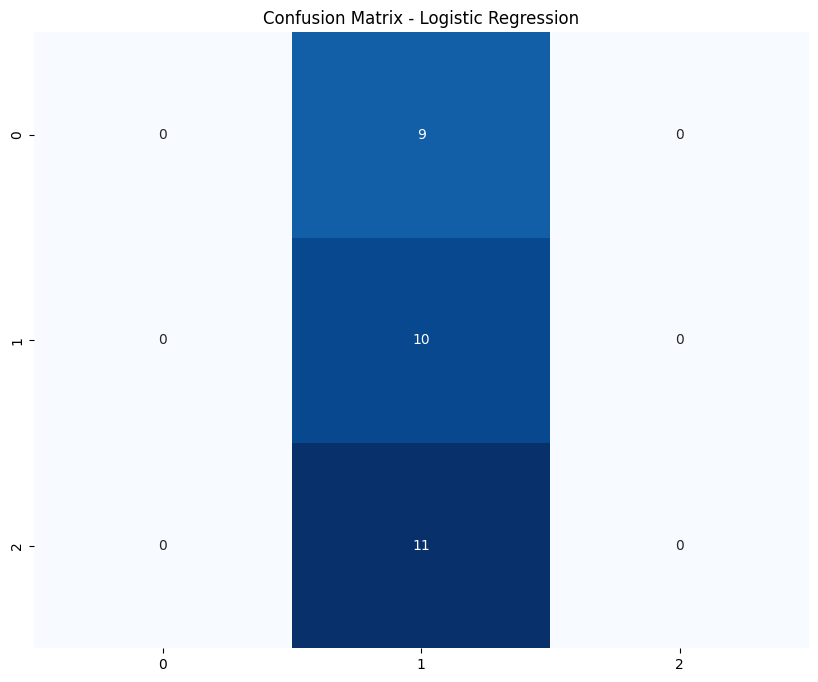


MLP Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


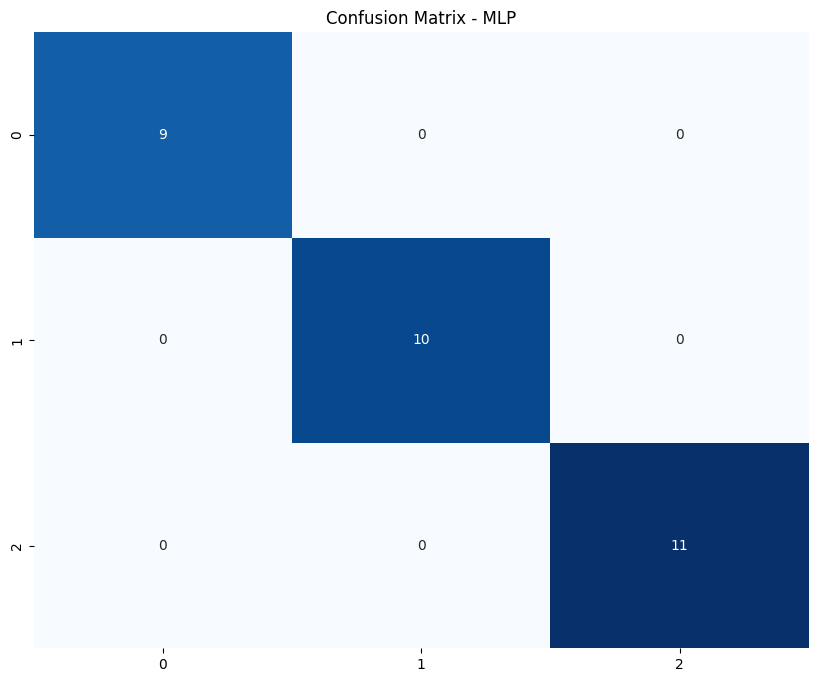


RBF Neural Network Metrics:
Accuracy: 0.9333
Precision: 0.9444
Recall: 0.9333
F1 Score: 0.9330


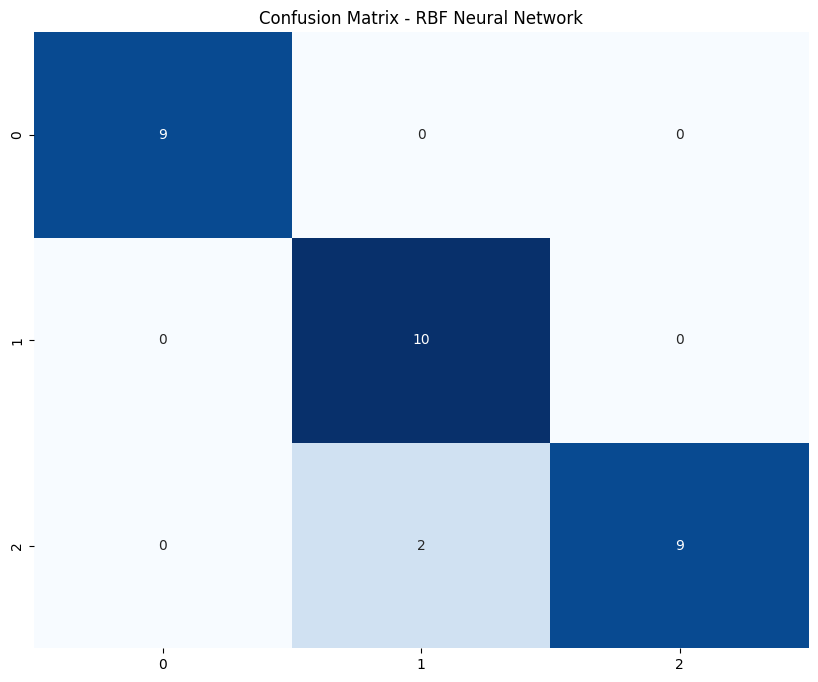

In [ ]:
# Confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_eval, lr_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Evaluate MLP
mlp_accuracy = accuracy_score(y_eval, mlp_pred)
mlp_precision = precision_score(y_eval, mlp_pred, average='weighted')
mlp_recall = recall_score(y_eval, mlp_pred, average='weighted')
mlp_f1 = f1_score(y_eval, mlp_pred, average='weighted')

print("\nMLP Metrics:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")

# Confusion matrix for MLP
mlp_cm = confusion_matrix(y_eval, mlp_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP")
plt.show()

# Evaluate RBF Neural Network
rbf_accuracy = accuracy_score(y_eval, rbf_pred)
rbf_precision = precision_score(y_eval, rbf_pred, average='weighted')
rbf_recall = recall_score(y_eval, rbf_pred, average='weighted')
rbf_f1 = f1_score(y_eval, rbf_pred, average='weighted')

print("\nRBF Neural Network Metrics:")
print(f"Accuracy: {rbf_accuracy:.4f}")
print(f"Precision: {rbf_precision:.4f}")
print(f"Recall: {rbf_recall:.4f}")
print(f"F1 Score: {rbf_f1:.4f}")

# Confusion matrix for RBF Neural Network
rbf_cm = confusion_matrix(y_eval, rbf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(rbf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - RBF Neural Network")
plt.show()